<h1>UK ACCIDENT REPORT DATA ANALYSIS</h1>

<h3>ANALYST: Abdul Barry A. Adam</h3>

<h1>IMPORTING LIBRARIES NEEDED</h1>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

<h1>IMPORTING DATASETS, LOCALLY, TO DATAFRAME</h1>

In [3]:
accident = pd.read_csv("./datasets/accident_data.csv")

In [4]:
accident

,Index,Accident_Severity,Accident_Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,5/6/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,2/7/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,3/9/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18-02-2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21-02-2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23-02-2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23-02-2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


<h1>INFORMATION</h1>

In [5]:
accident.describe()

,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles
count,660654.000000,660653.000000,660679.000000,660679.000000
mean,52.553866,-1.431210,1.357040,1.831255
std,1.406922,1.383330,0.824847,0.715269
min,49.914430,-7.516225,1.000000,1.000000
25%,51.490690,-2.332291,1.000000,1.000000
50%,52.315641,-1.411667,1.000000,2.000000
75%,53.453452,-0.232869,1.000000,2.000000
max,60.757544,1.762010,68.000000,32.000000


In [6]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident_Date            660679 non-null  object 
 3   Latitude                 660654 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660653 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  659953 non-null  object 
 10  Road_Type                656159 non-null  object 
 11  Urban_or_Rural_Area      660664 non-null  object 
 12  Weather_Conditions       646551 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

In [7]:
accident.dtypes

Index                       object
Accident_Severity           object
Accident_Date               object
Latitude                   float64
Light_Conditions            object
District Area               object
Longitude                  float64
Number_of_Casualties         int64
Number_of_Vehicles           int64
Road_Surface_Conditions     object
Road_Type                   object
Urban_or_Rural_Area         object
Weather_Conditions          object
Vehicle_Type                object
dtype: object

<h1>CONVERT COLUMNS TO ITS APPROPRIATE DATA TYPE</h1>

In [8]:
accident['Index'] = accident['Index'].astype('category')
accident['Accident_Severity'] = accident['Accident_Severity'].astype('category')
accident['Accident_Date'] = pd.to_datetime(accident['Accident_Date'], dayfirst = True, errors = 'coerce') 
accident['Light_Conditions'] = accident['Light_Conditions'].astype('category')
accident['District Area'] = accident['District Area'].astype('category')
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].astype('category')
accident['Road_Type'] = accident['Road_Type'].astype('category')
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].astype('category')
accident['Weather_Conditions'] = accident['Weather_Conditions'].astype('category')
accident['Vehicle_Type'] = accident['Vehicle_Type'].astype('category')

<h1>DETERMINING NULL VALUES AND FILLNG THEM</h1>

<h4>DETERMING NULLS</h4>

In [9]:
accident.isnull().sum()

Index                           0
Accident_Severity               0
Accident_Date              395672
Latitude                       25
Light_Conditions                0
District Area                   0
Longitude                      26
Number_of_Casualties            0
Number_of_Vehicles              0
Road_Surface_Conditions       726
Road_Type                    4520
Urban_or_Rural_Area            15
Weather_Conditions          14128
Vehicle_Type                    0
dtype: int64

In [10]:
FreqDate = accident['Accident_Date'].mode()[0]
AveLat = accident['Latitude'].mean()
AveLot = accident['Longitude'].mean()
FreqSurConditions = accident['Road_Surface_Conditions'].mode()[0]
FreqgRoadType = accident['Road_Type'].mode()[0]
FreqArea = accident['Urban_or_Rural_Area'].mode()[0]


<h4>FILLING NULLS</h4>

In [11]:
accident['Accident_Date'] = accident['Accident_Date'].fillna(FreqDate)
accident['Latitude'] = accident['Latitude'].fillna(AveLat)
accident['Longitude'] = accident['Longitude'].fillna(AveLot)
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].fillna(FreqSurConditions)
accident['Road_Type'] = accident['Road_Type'].fillna(FreqgRoadType)
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].fillna(FreqArea)


<h4>LAST CHECKUP</h4>

In [12]:
accident.isnull().sum()

Index                          0
Accident_Severity              0
Accident_Date                  0
Latitude                       0
Light_Conditions               0
District Area                  0
Longitude                      0
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions        0
Road_Type                      0
Urban_or_Rural_Area            0
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

In [13]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Index                    660679 non-null  category      
 1   Accident_Severity        660679 non-null  category      
 2   Accident_Date            660679 non-null  datetime64[ns]
 3   Latitude                 660679 non-null  float64       
 4   Light_Conditions         660679 non-null  category      
 5   District Area            660679 non-null  category      
 6   Longitude                660679 non-null  float64       
 7   Number_of_Casualties     660679 non-null  int64         
 8   Number_of_Vehicles       660679 non-null  int64         
 9   Road_Surface_Conditions  660679 non-null  category      
 10  Road_Type                660679 non-null  category      
 11  Urban_or_Rural_Area      660679 non-null  category      
 12  Weather_Conditio

In [14]:
accident['Year'] = accident['Accident_Date'].dt.year
accident['dayOfWeek'] = accident['Accident_Date'].dt.dayofweek
accident['Month'] = accident['Accident_Date'].dt.month
# accident['Max_Casua']

# accident['Year']  = accident['Year'].astype('category')
# accident['dayOfWeek'] = accident['dayOfWeek'].astype('category')
# accident['Month'] = accident['Month'].astype('category')

In [15]:
accident

,Index,Accident_Severity,Accident_Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,dayOfWeek,Month
0,200701BS64157,Serious,2019-06-05,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,2,6
1,200701BS65737,Serious,2019-07-02,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car,2019,1,7
2,200701BS66127,Serious,2021-02-11,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,Single carriageway,Urban,NaN,Taxi/Private hire car,2021,3,2
3,200701BS66128,Serious,2021-02-11,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats),2021,3,2
4,200701BS66837,Slight,2019-09-03,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,Single carriageway,Urban,NaN,Other vehicle,2019,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,2021-02-11,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car,2021,3,2
660675,201091NM01881,Slight,2021-02-11,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car,2021,3,2
660676,201091NM01935,Slight,2021-02-11,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car,2021,3,2
660677,201091NM01964,Serious,2021-02-11,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc,2021,3,2


<h1>DATA ANALYTICS</h1>
<h2>UniVariate</h2>
<h3>Vehicle's type that is frequently on accident</h3>
<h4>Vehicle Type</h4>
<hr>

In [16]:
types = accident['Vehicle_Type'].value_counts()
types

Vehicle_Type
Car                                      497992
Van / Goods 3.5 tonnes mgw or under       34160
Bus or coach (17 or more pass seats)      25878
Motorcycle over 500cc                     25657
Goods 7.5 tonnes mgw and over             17307
Motorcycle 125cc and under                15269
Taxi/Private hire car                     13294
Motorcycle over 125cc and up to 500cc      7656
Motorcycle 50cc and under                  7603
Goods over 3.5t. and under 7.5t            6096
Other vehicle                              5637
Minibus (8 - 16 passenger seats)           1976
Agricultural vehicle                       1947
Pedal cycle                                 197
Data missing or out of range                  6
Ridden horse                                  4
Name: count, dtype: int64

<h1>INSIGHT #1</h1>
<h2>Car is the most frequent type of vehicle involved in an accidents</h2>

<h3>Road's Type that has the most accidents</h3>

In [17]:
roadAccidents = accident['Road_Type'].value_counts()

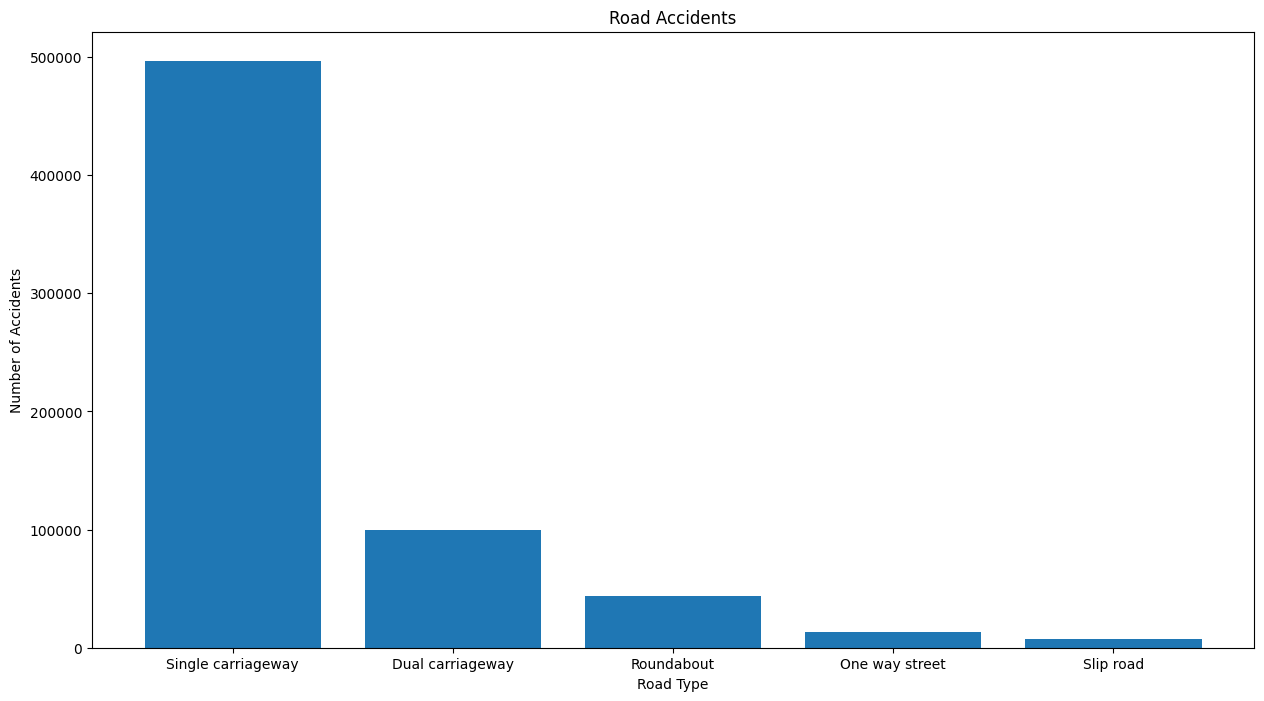

In [59]:
a = roadAccidents.reset_index()

plt.bar(a["Road_Type"], a["count"])
plt.title("Road Accidents")
plt.ylabel("Number of Accidents")
plt.xlabel("Road Type")
plt.gcf().set_size_inches(15,8)
plt.show()

<p>A single carriageway is a road with one or more lanes for traffic traveling in each direction, with no physical separation between the two directions</p>

<h1>INSIGHT #2</h1>
<h2>Single Carriageway road has the most recorded accidents in UK</h2>
<h1>INSIGHT #3</h1>
<h2>According to one way street, there are 2.05% Rear-End Collisions accident</h2>

In [20]:
po = accident[accident['Road_Type'] == 'Single carriageway']

In [21]:
po['Accident_Severity'].value_counts()

Accident_Severity
Slight     419563
Serious     70540
Fatal        6560
Name: count, dtype: int64

In [22]:
accident['Accident_Severity'].value_counts()

Accident_Severity
Slight     563801
Serious     88217
Fatal        8661
Name: count, dtype: int64

In [23]:
(8661 / 660679) * 100

1.3109240644851736

<h3>Percentile Distribution of accident severity category</h3>

In [24]:
allAccidents = accident['Accident_Severity'].value_counts()

In [60]:
def getPieChart(column):
    column_array = np.array(column)
    value, occurences = np.unique(column_array, return_counts=True)

    # set the explode effect
    explode = [0.02] #initialize the list
    explode = explode*len(list(occurences)) #sets the explode list according to the length of values
    explode_part = list(occurences).index(occurences.max()) #set where the explode should happen
    explode[explode_part] = 0.08
    return [occurences, value, explode]

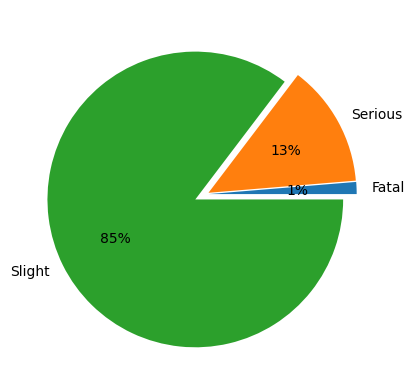

In [62]:
accidentChart = getPieChart(accident["Accident_Severity"])
plt.pie(accidentChart[0], labels=accidentChart[1], explode=accidentChart[2], autopct='%.0f%%')
plt.show()

In [25]:
allAccidents

Accident_Severity
Slight     563801
Serious     88217
Fatal        8661
Name: count, dtype: int64

<h1>INSIGHT #4</h1>
<h2>Only 1.31% of 660,607 accidents took a life and 85.3% of recorded accidents only caused a slight severity</h2>

<h3>Annual Accidents</h3>

In [78]:
annualAccident = accident['Year'].value_counts().reset_index()

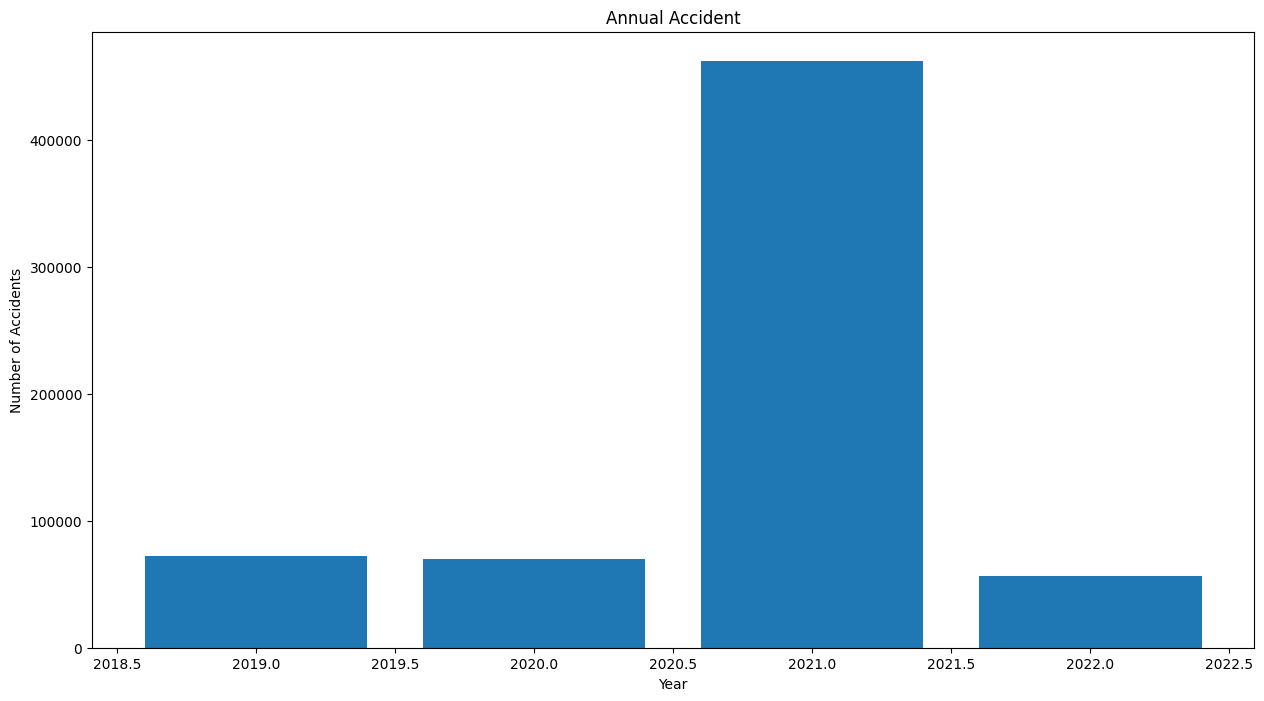

In [89]:
plt.bar(annualAccident["Year"], annualAccident["count"])
plt.title("Annual Accident")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.gcf().set_size_inches(15,8)
plt.show()

<h1>INSIGHT #5</h1>
<h2>The average annual accidents rised to 59% in 2021 and dropped by approximiately 61% by 2022</h2>

In [91]:
month = accident['Month'].value_counts().reset_index()
month

,Month,count
0,2,417936
1,11,24240
2,12,24156
3,10,23962
4,7,22939
5,9,22558
6,6,22196
7,3,21824
8,5,21723
9,8,21106


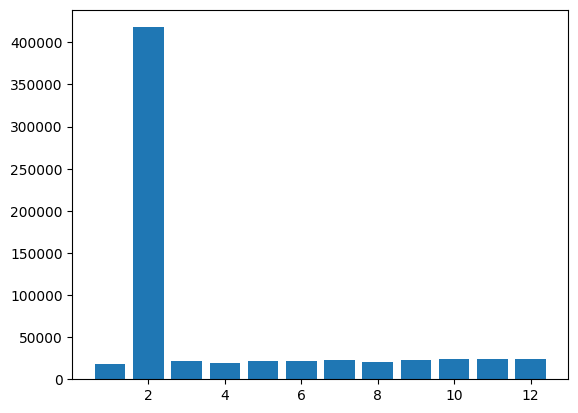

In [93]:
plt.bar(month["Month"], month["count"])
plt.show()

<h1>INSIGHT #6</h1>
<h2>The Month of February is recorded as the most dangerous or has the highest tendency of accidents</h2>

In [28]:
accident['District Area'].mode()[0]

'Birmingham'

In [29]:
BirminghamAccidents = accident[accident['District Area'] == 'Birmingham']

In [30]:
BirminghamAccidents['Accident_Severity'].value_counts()

Accident_Severity
Slight     11912
Serious     1474
Fatal        105
Name: count, dtype: int64

<h1>INSIGHT #7</h1>
<h2>Birmingham district area has the most recorded accidents but only 0.7% were fatal</h2>

In [31]:
BirminghamDayAccidents = BirminghamAccidents[BirminghamAccidents['Light_Conditions'] == 'Daylight']
BirminghamNightAccidents = BirminghamAccidents[BirminghamAccidents['Light_Conditions'] != 'Daylight']

In [32]:
print(f'''

Birmingham Accidents

NIGHT: {len(BirminghamNightAccidents)} | {np.round((len(BirminghamNightAccidents)/len(BirminghamAccidents))*100, 2)}%
DAY: {len(BirminghamDayAccidents)} | {np.round((len(BirminghamDayAccidents)/len(BirminghamAccidents))*100, 2)}%

TOTAL: {len(BirminghamAccidents)}

''')



Birmingham Accidents

NIGHT: 3824 | 28.34%
DAY: 9667 | 71.66%

TOTAL: 13491




<h1>INSIGHT #8</h1>
<h2>Birmingham accidents reveal a significantly higher number of it are occuring during the day compared to the night where daylight accident accounts for 71% of the total accidents compared to the night time accident which only accounts for 28%.</h2>

In [33]:
accident['Number_of_Casualties'].max()

68

In [34]:
accident[accident['Number_of_Casualties'] == accident['Number_of_Casualties'].max()]

,Index,Accident_Severity,Accident_Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,dayOfWeek,Month
117980,200743N002017,Fatal,2019-01-03,51.497547,Darkness - lights lit,South Bucks,-0.496697,68,1,Wet or damp,Slip road,Rural,Raining no high winds,Car,2019,3,1


<h1>INSIGHT #9</h1>
<h2>In the Night time of January 2019, the highest recorded number of casualties is in South Bucks Area, with the number of casualties of 68</h2>

In [35]:
averageCasualties = np.round(accident['Number_of_Casualties'].mean(), 0)

In [36]:
averageCasualties

1.0

<h1>INSIGHT #10</h1>
<h2>The average number of casualties is 1</h2>

In [37]:
averageVehicleInvolved = np.round(accident['Number_of_Vehicles'].mean(), 0)
averageVehicleInvolved

2.0

<h1>INSIGHT #11</h1>
<h2>The average number of vehicles involved are 2</h2>

In [38]:
accident[accident['Number_of_Vehicles'] == 1].count()[0]

C:\Users\PC\AppData\Local\Temp\ipykernel_13464\291871886.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  accident[accident['Number_of_Vehicles'] == 1].count()[0]


200787

<h1>INSIGHT #12</h1>
<h2>About 30% of accidents, only one vehicles are involved, this 30% may mean human-errors or environment factors </h2>

In [39]:
winterAccidents = accident[(accident['Month'] >= 12) | (accident['Month'] <= 2)]
springAccidents = accident[(accident['Month'] >= 3) & (accident['Month'] <= 5)]
summerAccidents = accident[(accident['Month'] >= 6) & (accident['Month'] <= 8)]
autumnAccidents = accident[(accident['Month'] >= 9) & (accident['Month'] <= 11)]


print(f'''

WINTER: {len(winterAccidents)}
SPRING: {len(springAccidents)}
SUMMER: {len(summerAccidents)}
AUTUMN: {len(autumnAccidents)}

''')



WINTER: 460344
SPRING: 63334
SUMMER: 66241
AUTUMN: 70760




<h1>INSIGHT #13</h1>
<h2>Accidents are most prevalent during winter season</h2>

<h1>BiVariate</h1>

<h3>CASUALTIES = VEHICLES INVOLVED</h3>

In [40]:
NumCasVec = accident['Number_of_Casualties'].corr(accident['Number_of_Vehicles'])

In [41]:
NumCasVec

0.2288888612692756

<h1>INSIGHT #14</h1>
<h2>The p-value is less than 0.5, therefore, the Number of Vehicles does not necesarrily cause more casualties</h2>

In [42]:
seveCasualties = accident.groupby(['Light_Conditions'])['Number_of_Vehicles'].sum()

C:\Users\PC\AppData\Local\Temp\ipykernel_13464\1879934753.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seveCasualties = accident.groupby(['Light_Conditions'])['Number_of_Vehicles'].sum()


In [43]:
seveCasualties

Light_Conditions
Darkness - lighting unknown     11402
Darkness - lights lit          229634
Darkness - lights unlit          4457
Darkness - no lighting          59891
Daylight                       904488
Name: Number_of_Vehicles, dtype: int64

<h1>INSIGHT #15</h1>
<h2>Contrary to the beliefs, Daylight accidents is more prominient compared to night accidents</h2>

In [44]:
roadSeverity = accident.groupby(['Accident_Severity', 'Road_Type']).size().unstack()
roadSeverity

C:\Users\PC\AppData\Local\Temp\ipykernel_13464\4061803513.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  roadSeverity = accident.groupby(['Accident_Severity', 'Road_Type']).size().unstack()


Road_Type,Dual carriageway,One way street,Roundabout,Single carriageway,Slip road
Accident_Severity,,,,,
Fatal,1815,95,142,6560,49
Serious,11746,1655,3665,70540,611
Slight,85863,11809,40185,419563,6381


<h1>INSIGHT #16</h1>
<h2>Single carriageway has the most recorded accidents according to insight #2, but only 1.3% of it were fatal</h2>

In [141]:
year_sev = accident.groupby(['Accident_Severity','Year']).size().unstack()
year_sev

C:\Users\PC\AppData\Local\Temp\ipykernel_13464\312886936.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  year_sev = accident.groupby(['Accident_Severity','Year']).size().unstack()


Year,2019,2020,2021,2022
Accident_Severity,,,,
Fatal,1116,942,5980,623
Serious,9823,9346,61782,7266
Slight,60928,59875,394082,48916


<Axes: xlabel='Accident_Severity'>

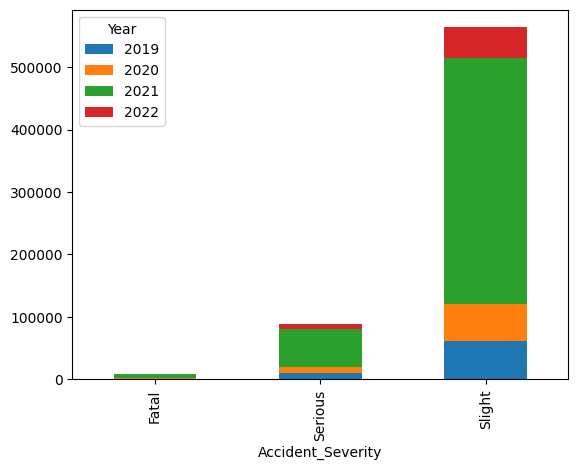

In [142]:
year_sev.plot(kind="bar", stacked=True)


<h1>INSIGHT #17</h1>
<h2>The year of 2019 has the highest fatality rate of 1.5% compared to other </h2>
<p>2020 has 1.3%, 2021 has 1.2% and lastly, 2022 has 1.1% fatality rate</p>

In [46]:
# year2019 = accident[accident['Year'] == 2019]['Month'].value_counts()
# year2020 = accident[accident['Year'] == 2020]['Month'].value_counts()
# year2021 = accident[accident['Year'] == 2021]['Month'].value_counts()
# year2022 = accident[accident['Year'] == 2022]['Month'].value_counts()


annualAccidentReport = accident.groupby(['Year','Month']).size()

In [47]:
annualAccidentReport

Year  Month
2019  1          5318
      2          6173
      3          5903
      4          5178
      5          6265
      6          5840
      7          6080
      8          5995
      9          5949
      10         6229
      11         6241
      12         6696
2020  1          5146
      2          6022
      3          5579
      4          5457
      5          5837
      6          5770
      7          6215
      8          5394
      9          5869
      10         6275
      11         5872
      12         6727
2021  1          4545
      2        400710
      3          5200
      4          4943
      5          5265
      6          5628
      7          5655
      8          5209
      9          5649
      10         5999
      11         6352
      12         6689
2022  1          3243
      2          5031
      3          5142
      4          4209
      5          4356
      6          4958
      7          4989
      8          4508
      9          509

<h1>INSIGHT #18</h1>
<h2>January has the least tendency of accidents from 2019-2022</h2>

In [48]:
motorAccident = accident[accident['Vehicle_Type'].isin(['Motorcycle over 500cc','Motorcycle over 125cc and up to 500cc','Motorcycle 50cc and under'])]
motorAccident['Accident_Severity'].value_counts()

Accident_Severity
Slight     34892
Serious     5485
Fatal        539
Name: count, dtype: int64

<h1>INSIGHT #19</h1>
<h2>Contrary to the beliefs that motorcycle are more fatal than other type of vehicle, most of the accident involving motorcycle only caused slight severity, Only 1.3% of the total motorcycle accident are fatal</h2>

In [49]:
motorAccident[motorAccident['Accident_Severity'] == 'Fatal']['Urban_or_Rural_Area'].value_counts()

Urban_or_Rural_Area
Rural          338
Urban          201
Unallocated      0
Name: count, dtype: int64

<h1>INSIGHT #20</h1>
<h2>Most of the fatal motorcycle accident happened at Rural Area instead of Urban when there's a high traffic volume</h2>

In [50]:
accident.groupby('Vehicle_Type')['Number_of_Casualties'].max()

C:\Users\PC\AppData\Local\Temp\ipykernel_13464\726724495.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  accident.groupby('Vehicle_Type')['Number_of_Casualties'].max()


Vehicle_Type
Agricultural vehicle                      8
Bus or coach (17 or more pass seats)     62
Car                                      68
Data missing or out of range              2
Goods 7.5 tonnes mgw and over            19
Goods over 3.5t. and under 7.5t          21
Minibus (8 - 16 passenger seats)          9
Motorcycle 125cc and under               13
Motorcycle 50cc and under                12
Motorcycle over 125cc and up to 500cc    11
Motorcycle over 500cc                    27
Other vehicle                             9
Pedal cycle                               5
Ridden horse                              2
Taxi/Private hire car                    25
Van / Goods 3.5 tonnes mgw or under      48
Name: Number_of_Casualties, dtype: int64

<h1>INSIGHT #21</h1>
<h2>Car has the highest recorded casualties in an incident, while ridden horse has the least</h2>

In [51]:
accident[accident['Accident_Severity'] == 'Fatal']['Vehicle_Type'].value_counts()

Vehicle_Type
Car                                      6577
Van / Goods 3.5 tonnes mgw or under       467
Motorcycle over 500cc                     339
Bus or coach (17 or more pass seats)      325
Goods 7.5 tonnes mgw and over             216
Motorcycle 125cc and under                189
Taxi/Private hire car                     155
Motorcycle over 125cc and up to 500cc     105
Motorcycle 50cc and under                  95
Other vehicle                              70
Goods over 3.5t. and under 7.5t            67
Minibus (8 - 16 passenger seats)           29
Agricultural vehicle                       21
Pedal cycle                                 6
Data missing or out of range                0
Ridden horse                                0
Name: count, dtype: int64

<H1>BELOW ARE REVIEWER MATERIAL</H1>

In [97]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Index                    660679 non-null  category      
 1   Accident_Severity        660679 non-null  category      
 2   Accident_Date            660679 non-null  datetime64[ns]
 3   Latitude                 660679 non-null  float64       
 4   Light_Conditions         660679 non-null  category      
 5   District Area            660679 non-null  category      
 6   Longitude                660679 non-null  float64       
 7   Number_of_Casualties     660679 non-null  int64         
 8   Number_of_Vehicles       660679 non-null  int64         
 9   Road_Surface_Conditions  660679 non-null  category      
 10  Road_Type                660679 non-null  category      
 11  Urban_or_Rural_Area      660679 non-null  category      
 12  Weather_Conditio

In [111]:
year_severity = accident.groupby(["Accident_Severity","Month"]).size().reset_index(name="Accident_Count")

C:\Users\PC\AppData\Local\Temp\ipykernel_13464\2694129933.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  year_severity = accident.groupby(["Accident_Severity","Month"]).size().reset_index(name="Accident_Count")


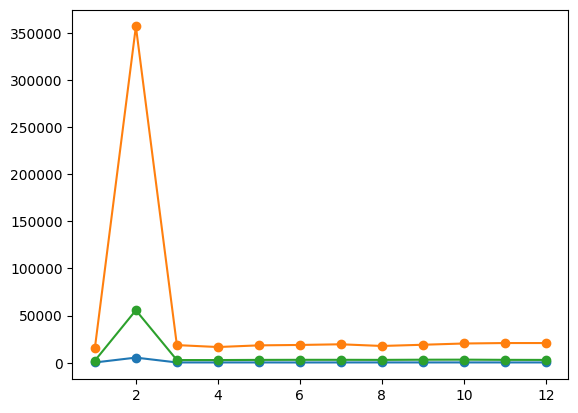

In [125]:
year_severity

#pivot
cat_pivot = year_severity.pivot(index="Month", columns="Accident_Severity", values="Accident_Count")


plt.plot(cat_pivot.index, cat_pivot["Fatal"], label="Fatal", marker="o")
plt.plot(cat_pivot.index, cat_pivot["Slight"], label="Fatal", marker="o")
plt.plot(cat_pivot.index, cat_pivot["Serious"], label="Fatal", marker="o")

plt.show()

In [120]:
month_severity = accident.groupby(["Month","Accident_Severity"]).size().unstack()

C:\Users\PC\AppData\Local\Temp\ipykernel_13464\4029475813.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  month_severity = accident.groupby(["Month","Accident_Severity"]).size().unstack()


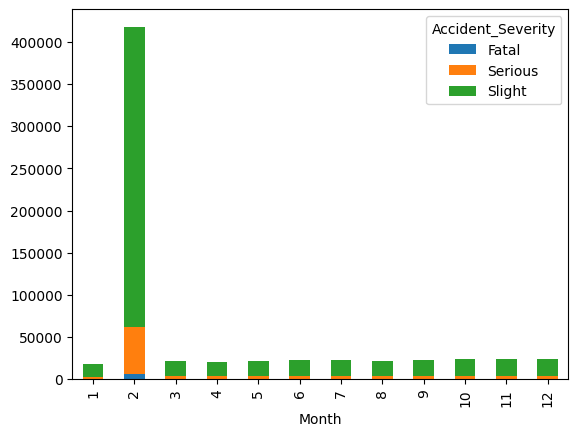

In [127]:
month_severity.plot(kind="bar", stacked=True)


plt.show()